In [1]:
import os

os.getcwd()

'/Users/lengyueshuang/Desktop/job/interview preparation/GIC'

In [2]:
import pandas as pd

data1 = pd.read_csv(r'./Data1.csv')
data1.head(5)

,date,strategy,var1,var2,var3,var4
0,1/25/2011,C,12375.237180,1707.481134,5.750718,1.315383
1,5/7/2010,B,7982.275099,331.881463,5.366168,1.032286
2,12/26/2010,C,8786.485868,6998.835964,5.189509,0.681395
3,6/28/2011,C,9703.536468,3692.907194,9.167816,1.220821
4,11/21/2010,D,6994.323937,2.305282,10.106145,2.922188


In [3]:
data2 = pd.read_csv(r'./Data2.csv')
data2.head(5)

,date,revenue
0,3/4/2011,614.403760
1,2/28/2010,556.188278
2,10/30/2011,582.952528
3,9/8/2011,436.568561
4,6/21/2010,251.184637


In [4]:
data = pd.merge(data1,data2,on='date')
data.head(5)

,date,strategy,var1,var2,var3,var4,revenue
0,1/25/2011,C,12375.237180,1707.481134,5.750718,1.315383,362.173306
1,5/7/2010,B,7982.275099,331.881463,5.366168,1.032286,444.779601
2,12/26/2010,C,8786.485868,6998.835964,5.189509,0.681395,497.644664
3,6/28/2011,C,9703.536468,3692.907194,9.167816,1.220821,371.761038
4,11/21/2010,D,6994.323937,2.305282,10.106145,2.922188,428.854293


In [5]:
data.isnull().any() # no missing data

date        False
strategy    False
var1        False
var2        False
var3        False
var4        False
revenue     False
dtype: bool

# mean and hightest revenue for each strategy

In [6]:
data.groupby('strategy').revenue.mean()

strategy
A    384.171008
B    426.450196
C    352.580295
D    509.689140
Name: revenue, dtype: float64

In [7]:
data.groupby('strategy').revenue.max()

strategy
A    569.848926
B    638.428737
C    537.023638
D    697.897312
Name: revenue, dtype: float64

# compare dailly revenue numbers by sales strategy using boxplot and histograms

<AxesSubplot:xlabel='strategy', ylabel='revenue'>

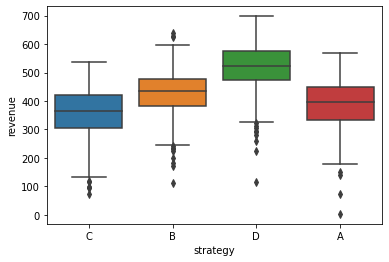

In [8]:
import seaborn as sns

sns.boxplot(data = data, x = 'strategy', y ="revenue")

<AxesSubplot:xlabel='revenue', ylabel='Count'>

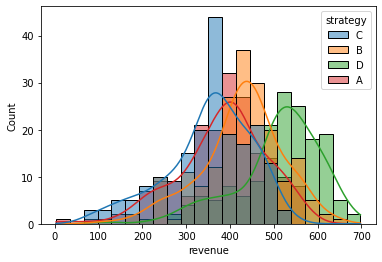

In [9]:
sns.histplot(data = data, x = "revenue", kde = True, hue = "strategy")

# how the variables influence the daily revenue

In [ ]:
## we can take a look at the numerical data first

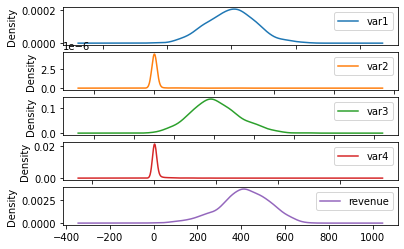

In [10]:
# First, we can get the distribution using Univariate Density Plots
import matplotlib.pyplot as plt
import pandas

data.plot(kind='density', subplots=True, sharex=False)
plt.show()

### from plot above we can tell that var2 and var4 are heavily right skewed. So we take log transformation for those two variables.

In [5]:
import numpy as np

data[['var2_log','var4_log']] = data[['var2','var4']].apply(lambda x: np.log(x))  

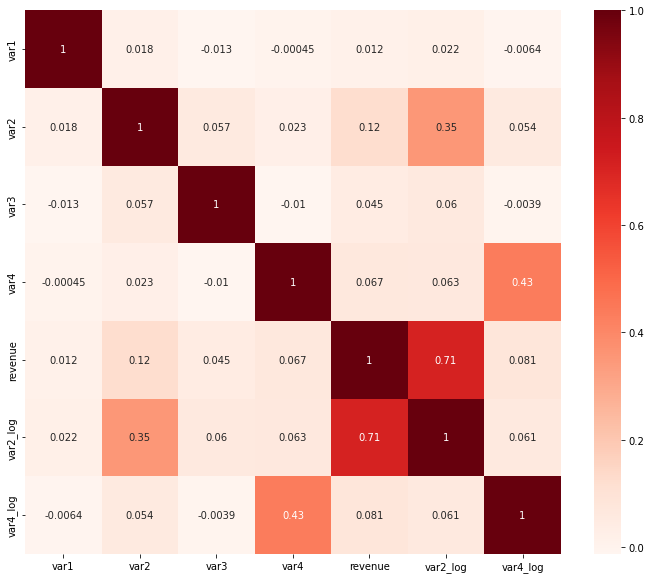

In [12]:
# Then, using Pearson Correlation

plt.figure(figsize=(12,10))
cor = data.corr() # [['var1','var2','var3','var4','revenue']]
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

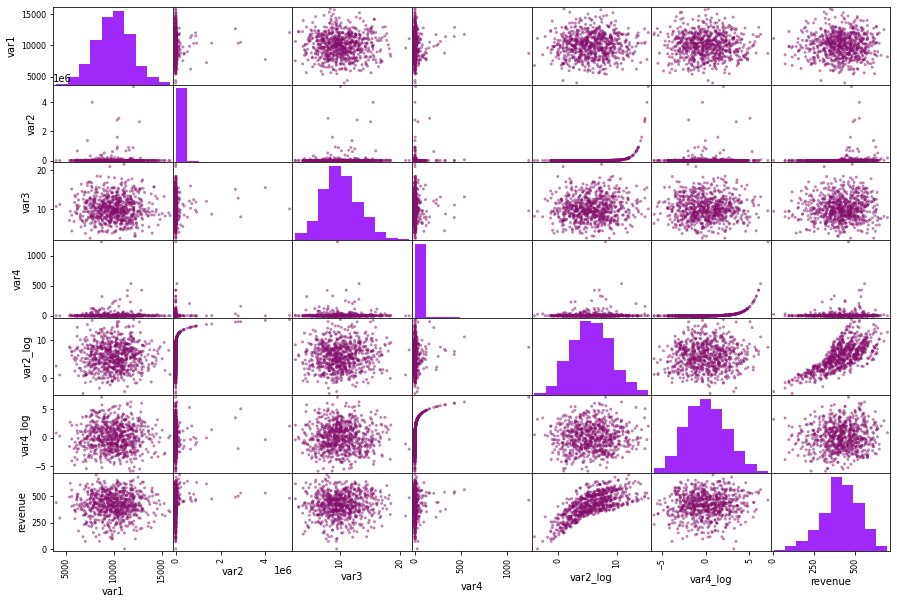

In [13]:
##  check the correlation using a scatter matrix.

from pandas.plotting import scatter_matrix

attributes = ['var1','var2','var3','var4','var2_log','var4_log','revenue']
scatter_matrix(data[attributes], figsize=(15, 10), color='#840E6B', hist_kwds={'color':['#A029FA']})
plt.show()

### for var1 and var3, they have weak correlation with revenue. After log transformation, var2_log has strong correlation with revenue. 

### Then for categorical data, we can tell that strategies are evenly distributed, expect that strategy D is relatively less applied.

/Users/lengyueshuang/miniforge3/envs/nlp/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='strategy', ylabel='count'>

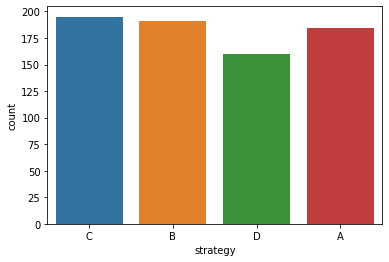

In [14]:
sns.countplot(data['strategy'])

# predict revenue using strategy and var1-var4

# Linear Regression

In [25]:
# ADD feature
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data_encoded = pd.get_dummies(data,columns=['strategy'])
y = data_encoded.revenue
X = data_encoded.drop(['date','revenue','var2','var4'],axis=1).values
X_train,X_test,y_train,y_test = train_test_split(X_poly, y, test_size=0.2,random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### now we have 45 variables, we may consider using Lasso regression to reduce the number of parameters 

In [27]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

model = Lasso(alpha=1)
model.fit(X_train_scaled,y_train)
y_hat = model.predict(X_test_scaled)

print("Train-set score: {:.2f}".format(model.score(X_train_scaled, y_train))) # R square
print("Test-set score: {:.2f}".format(model.score(X_test_scaled, y_test))) 

Train-set score: 0.83
Test-set score: 0.81


In [28]:
# Model performance
from sklearn.metrics import mean_squared_error, r2_score

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Coefficient of determination (R^2): %.3f' % r2_score(y_test, y_hat))
print('Mean squared error (MSE): %.3f'% mean_squared_error(y_test, y_hat))

Coefficients: [ 0.00000000e+00 -5.20936893e-01  0.00000000e+00  1.34829496e+02
  2.27378772e+00 -0.00000000e+00  4.94358951e+00 -1.37209330e+01
  3.63630670e+01 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -1.85864703e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  8.84345589e+00 -0.00000000e+00  4.06291251e-03
 -6.11667393e+01  0.00000000e+00  1.38554086e+00 -0.00000000e+00
 -0.00000000e+00  1.74107737e+00  1.68624490e+00 -0.00000000e+00
  2.35648635e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  8.87155087e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  1.19064347e+01]
Intercept: 418.34663252916107
Coefficient of determination (R^2): 0.808
Mean squared error (MSE): 2245.596


In [20]:
# those are the variables left
var_names = poly.get_feature_names(data_encoded.drop(['date','revenue','var2','var4'],axis=1).columns)
[var_names[i] for i in range(len(var_names)) if model.coef_[i]==0]

['1',
 'var3',
 'strategy_A',
 'var1^2',
 'var1 var3',
 'var1 var2_log',
 'var1 var4_log',
 'var1 strategy_A',
 'var1 strategy_B',
 'var1 strategy_D',
 'var3^2',
 'var3 var2_log',
 'var3 var4_log',
 'var3 strategy_A',
 'var3 strategy_C',
 'var2_log var4_log',
 'var2_log strategy_B',
 'var2_log strategy_C',
 'var4_log strategy_A',
 'var4_log strategy_C',
 'var4_log strategy_D',
 'strategy_A^2',
 'strategy_A strategy_B',
 'strategy_A strategy_C',
 'strategy_A strategy_D',
 'strategy_B strategy_C',
 'strategy_B strategy_D',
 'strategy_C^2',
 'strategy_C strategy_D']

##  RandomForestRegressor 

In [44]:
# prepare train and test data
from sklearn.model_selection import train_test_split

data_encoded = pd.get_dummies(data,columns=['strategy'])
y = data_encoded.revenue
X = data_encoded.drop(['date','revenue','var2_log','var4_log'],axis=1).values
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [113]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
import numpy as np

depth = np.arange(0,10,10)

estimator = RandomForestRegressor()   
param_grid = {
               'n_estimators': [100],
               'min_samples_split': [10,20,30],
               'max_depth':[3,5,10]
#     'ccp_alpha' : alpha,
}

# Perform GridSearch
model2 = GridSearchCV(estimator, param_grid=param_grid, cv=5, scoring = 'r2',
                         n_jobs=-1, return_train_score=True, verbose=1)

model2.fit(X_train, y_train)
y_hat = model2.predict(X_test)

print('r2 on train data set: ', model2.cv_results_['mean_train_score'])
print('r2 on test data set: ', model2.cv_results_['mean_test_score'])  
print("best dev score: {:.2f}".format(model2.best_score_))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
r2 on train data set:  [0.78706437 0.78646502 0.78156203 0.86987537 0.85792502 0.84221172
 0.92192293 0.88009018 0.85030285]
r2 on test data set:  [0.74414364 0.74506729 0.74089612 0.7958087  0.79450212 0.78850671
 0.7895448  0.79370477 0.78629098]
best dev score: 0.80


In [114]:
model2.best_params_

{'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}

In [115]:
print("Test-set score: {:.2f}".format(model2.score(X_test, y_test)))
print('Mean squared error (MSE): %.3f'% mean_squared_error(y_test, y_hat))

Test-set score: 0.76
Mean squared error (MSE): 2758.241


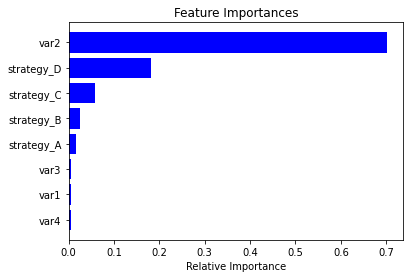

In [116]:
# visualize feature importance using the best parameter

import matplotlib.pyplot as plt

model2 = RandomForestRegressor(max_depth=5, min_samples_split=20, n_estimators=100) 
model2.fit(X_train, y_train)

features = data_encoded.drop(['date','revenue','var2_log','var4_log'],axis=1).columns
importances = model2.feature_importances_

indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## GradientBoostingRegressor

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
search_grid={'n_estimators':[50,100,200,400],'learning_rate':[0.0001,.001,0.01,.1],'max_depth':[1,2,4,8],
             'subsample':[.25,.5,.75,1],'random_state':[1]}
model3=GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='r2',return_train_score=True,n_jobs=-1,cv=5)

model3.fit(X_train, y_train)
y_hat = model3.predict(X_test)

In [46]:
model3.best_score_ 

0.8174395266256514

In [47]:
model3.best_params_

{'learning_rate': 0.1,
 'max_depth': 1,
 'n_estimators': 200,
 'random_state': 1,
 'subsample': 1}

In [48]:
# see the performance on test data

print("Test-set score: {:.2f}".format(model3.score(X_test, y_test)))
print('Mean squared error (MSE): %.3f'% mean_squared_error(y_test, y_hat))

Test-set score: 0.81
Mean squared error (MSE): 2230.570


# Xgboost Regressor

In [108]:
from xgboost.sklearn import XGBRegressor

search_grid = {'learning_rate':[0.05,0.1,0.15,0.2],'reg_alpha':[0.05,0.1,1,2,3],'reg_lambda':[0.05,0.1,1,2,3]}
other_params={'n_estimators':200,'max_depth':1,'random_state':1,'learning_rate':0.1,
              'gamma':0,'reg_lambda':.1, 'reg_alpha':0.1,'subsample':1,'colsample_bytree':.9}
model4=GridSearchCV(estimator=XGBRegressor(**other_params),param_grid=search_grid,scoring='r2',
                    return_train_score=True,n_jobs=-1,cv=5)

model4.fit(X_train, y_train)
y_hat = model3.predict(X_test)

print('r2 on train data set: ', model4.best_score_)
print("Test-set score: {:.2f}".format(model4.score(X_test, y_test)))
print('Mean squared error (MSE): %.3f'% mean_squared_error(y_test, y_hat))
print(model4.best_params_)

r2 on train data set:  0.8179679364016416
Test-set score: 0.81
Mean squared error (MSE): 2488.630
{'learning_rate': 0.1, 'reg_alpha': 3, 'reg_lambda': 0.1}


### we can tell that the Feature Importances is quite different from random forest

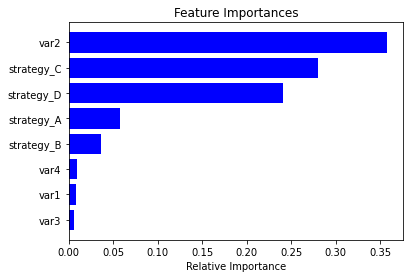

In [117]:
model4 = XGBRegressor(**other_params)
model4.fit(X_train, y_train)

features = data_encoded.drop(['date','revenue','var2_log','var4_log'],axis=1).columns
importances = model4.feature_importances_

indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## So far we have tried four models: linear regression, random forest, Gradient Boosting, and XGboosting. Based on the tests above, all model except for random forest generate similar r2: 0.81. However, compared to the other two models, linear regression have better Interpretability using coefficient.